In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0202.csv'
case0202 = pd.read_csv(path)

In [ ]:
!pip install pingouin

In [4]:
import pingouin as pg

In [10]:
case0202

,Unaffected,Affected
0,1.94,1.27
1,1.44,1.63
2,1.56,1.47
3,1.58,1.39
4,2.06,1.93
5,1.66,1.26
6,1.75,1.71
7,1.77,1.67
8,1.78,1.28
9,1.92,1.85


In [6]:
case0202.describe()

,Unaffected,Affected
count,15.000000,15.000000
mean,1.758667,1.560000
std,0.242424,0.301259
min,1.250000,1.020000
25%,1.600000,1.310000
50%,1.770000,1.590000
75%,1.935000,1.780000
max,2.080000,2.020000


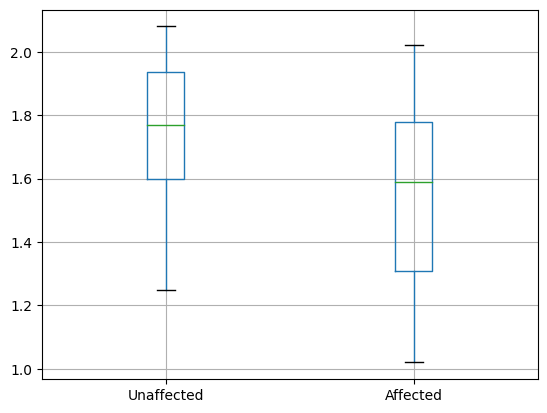

In [13]:
case0202.boxplot()
plt.show()

In [12]:
pd.melt(case0202)

,variable,value
0,Unaffected,1.94
1,Unaffected,1.44
2,Unaffected,1.56
3,Unaffected,1.58
4,Unaffected,2.06
5,Unaffected,1.66
6,Unaffected,1.75
7,Unaffected,1.77
8,Unaffected,1.78
9,Unaffected,1.92


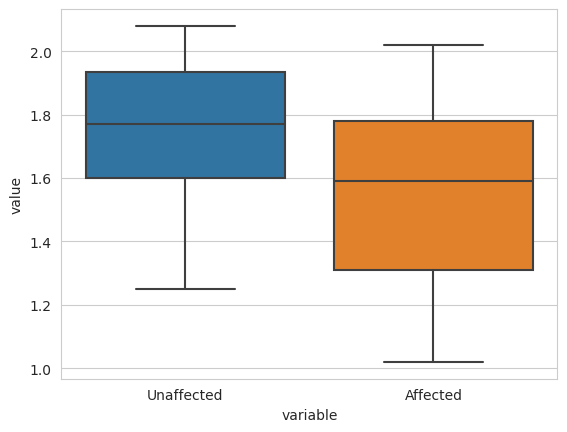

In [16]:
sns.boxplot(x="variable", y="value", data=pd.melt(case0202))
plt.show()

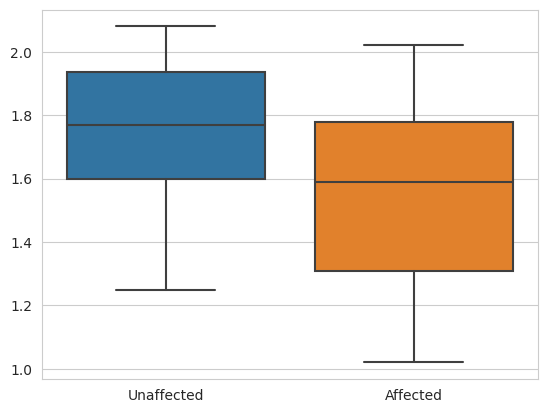

In [21]:
#or just
sns.boxplot(data=case0202)
plt.show()

In [24]:
# Calculate the difference D
Difference = case0202['Unaffected'] - case0202['Affected']

In [25]:
Difference.mean()

0.19866666666666669

#Assumptions
#1. Independence Yes --> for the difference
#2. Normality??

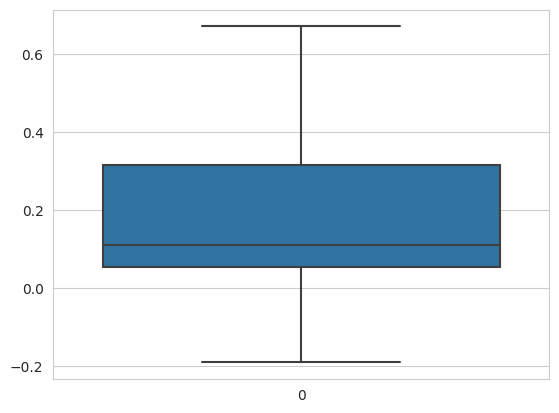

In [26]:
sns.boxplot(Difference)
plt.show()

#Looks not super normal

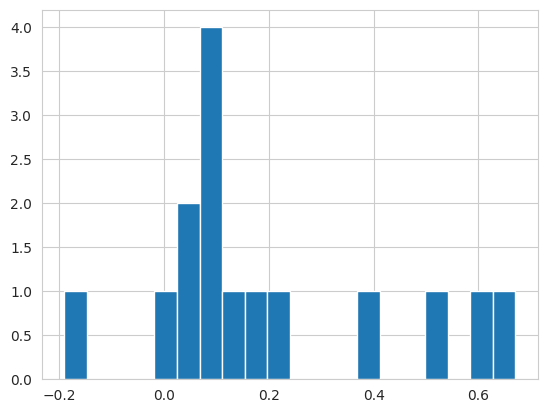

In [30]:
plt.hist(Difference, bins = 20)
plt.show()

 # Looks skewed definitely not a perfect normal distribution

# Shapiro test for normality:
# Null: Data IS normal
# Alternative is that is NOT normal

In [31]:
pg.normality(Difference)

,W,pval,normal
0,0.904433,0.111254,True


In [32]:
#or
from scipy.stats import shapiro

shapiro(Difference)

ShapiroResult(statistic=0.9044326543807983, pvalue=0.11125410348176956)

#Based on the p-value we fail to reject the hypothesis it is normal and
#this would tell us to conlcude that data normal

#HOWEVER,
#The p-value is close to 10% offering suggestive evidence in favor of the alternative
#The histograms and box plots indicate a skew.
#Based on N =15 it is hard to assess this assumption

#Lets do the t-test
# Null hypothesis: Population mean Difference = 0
# Alternative hypothesis: Population mean Difference is not zero

In [33]:
# Perform a one-sample t-test using pingouin
pg.ttest(Difference, y = 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.228928,14,two-sided,0.006062,"[0.07, 0.33]",0.833706,8.427,0.851087


# Based on the p-value (<0.05) we reject the null hypothesis and conclude that the mean population Difference is not zero. However, we also mention that the test has not met all the normality asssumption and the sample size is small (15 points).

# Moreover, this is an observational study so making inference for population (outside the sample space) is not advised.

In [40]:
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/ex0127.csv'
ex0127 = pd.read_csv(path)

In [41]:
ex0127

,State,Senator,Party,Pro2005,Anti2005,Pro2006,Anti2006,Pro2007,Anti2007,PctPro
0,Alabama,Session,R,1.0,18.0,0.0,7.0,2.0,13.0,7.32
1,Alabama,Shelby,R,1.0,19.0,0.0,7.0,1.0,14.0,4.76
2,Alaska,Murkowski,R,2.0,17.0,1.0,6.0,6.0,9.0,21.95
3,Alaska,Stevens,R,1.0,19.0,1.0,6.0,4.0,11.0,14.29
4,Arizona,Kyle,R,1.0,19.0,2.0,5.0,2.0,13.0,11.90
...,...,...,...,...,...,...,...,...,...,...
107,Wisconsin,Feingold,D,18.0,2.0,7.0,0.0,14.0,1.0,92.86
108,Wisconsin,Kohl,D,15.0,5.0,5.0,2.0,14.0,1.0,80.95
109,Wyoming,Barrasso,R,NaN,NaN,NaN,NaN,2.0,4.0,33.33
110,Wyoming,Enzi,R,2.0,18.0,0.0,7.0,2.0,13.0,9.52


27. Environmental Voting of Democrats and Republicans in the U.S. Senate. Display 1.16 shows the first five rows of a data set with pro- and anti-environment votes (according to the League of Conservation Voters; see Exercise 26) during 2005, 2006, and 2007, cast by U.S. senators.

Evaluate the evidence supporting party differences in the percentage of pro-environment votes. Write a brief report of your conclusion, and include a graphical display and summary statistics.


In [42]:
ex0127.describe(include = 'all')

,State,Senator,Party,Pro2005,Anti2005,Pro2006,Anti2006,Pro2007,Anti2007,PctPro
count,112,112,112,100.000000,100.000000,100.000000,100.000000,101.000000,101.000000,112.000000
unique,50,111,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Montana,Nelson,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,2,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.070000,10.590000,3.180000,3.690000,7.742574,6.950495,50.747946
std,NaN,NaN,NaN,7.588209,7.667451,2.610701,2.654118,5.354724,5.324239,36.867638
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,11.702500
50%,NaN,NaN,NaN,8.500000,11.500000,3.000000,4.000000,9.000000,5.000000,54.495000
75%,NaN,NaN,NaN,17.000000,18.000000,5.000000,6.000000,13.000000,13.000000,86.670000


In [44]:
ex0127[ex0127['Party']=='R']['PctPro'].describe()

count    57.000000
mean     18.545789
std      19.956449
min       0.000000
25%       4.760000
50%      11.900000
75%      26.670000
max      85.190000
Name: PctPro, dtype: float64

In [45]:
ex0127[ex0127['Party']=='D']['PctPro'].describe()

count     52.000000
mean      83.641346
std       12.513039
min       45.240000
25%       77.585000
50%       86.670000
75%       92.860000
max      100.000000
Name: PctPro, dtype: float64

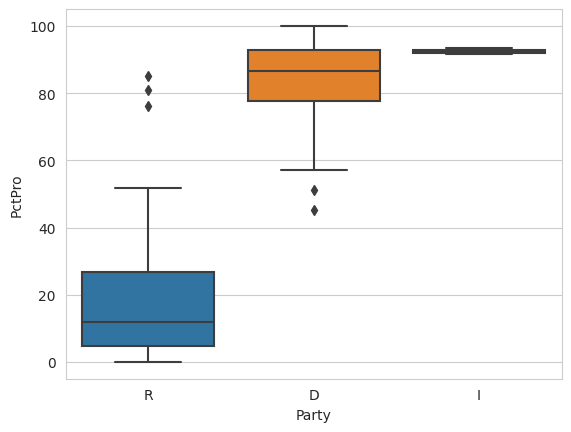

In [46]:
sns.boxplot(x = 'Party', y = 'PctPro', data = ex0127)
plt.show()

In [48]:
ex0127 = ex0127[ex0127['Party']!='I']

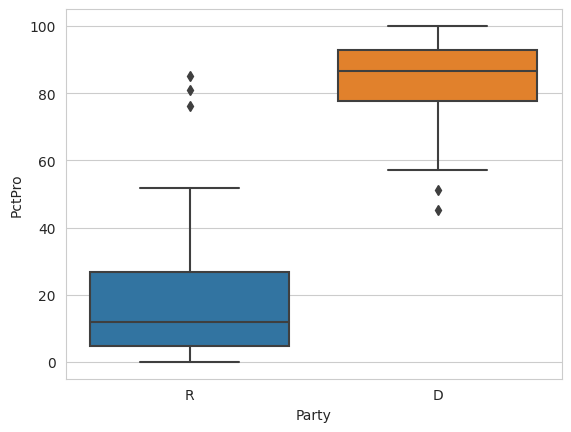

In [49]:
sns.boxplot(x = 'Party', y = 'PctPro', data = ex0127)
plt.show()

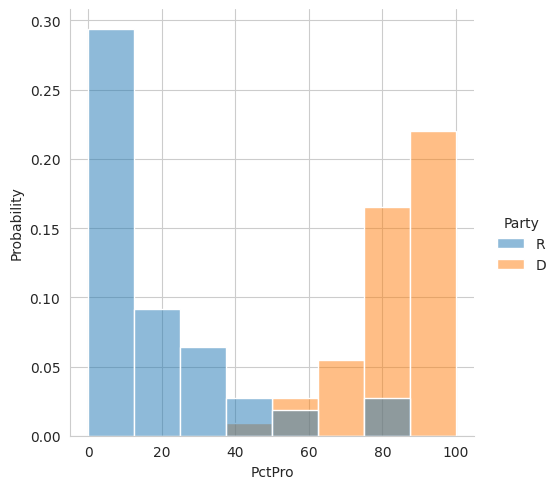

In [50]:
sns.displot(ex0127, x="PctPro", hue="Party", stat="probability")
plt.show()

Test the hypothesis “is the mean ProPro vote, $\mu_1$ of the D party significantly different than the mean, $\mu_2$ of R party?

 Assumptions:
 1) Populations are approximately normally distributed - check the distribution of the samples

 2) Samples are independent

 3) Both groups have equal variance - (we include: correction=False)

 4) Observations are independent

 Test hypothesis, $H_0: \mu_1 -\mu_2 = 0$, vs $H_1: \mu_1-\mu_2\neq0$

In [55]:
pg.ttest(x=ex0127[ex0127['Party']=='D']['PctPro'], y=ex0127[ex0127['Party']=='R']['PctPro'], paired=False, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,20.175962,107,two-sided,2.939237e-38,"[58.7, 71.49]",3.869086,4.569e+34,1.0


The test is statistically significant at the 5% significance level (two sided p_value<0.0001) from a two sample t-test. (95% confidence interval 58.7 to 71.49). This suggests that there is a significant difference between the mean votes of these two parties.